<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h1 style="color: #A2AAAD; margin: 50px auto 0;">Deep Q Learning Data Analysis</h1>
    <p style="color: #A2AAAD; margin: 10px auto 50px; font-size: 20px; height:80%;">Chandler Scott</p>
</div>

<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
        Read data into DataFrame
    </h3>
</div>

In [633]:
import pandas as pd

csv_file = 'stats.csv'


df = pd.read_csv(f'out/{csv_file}')
df

<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
Basic Plot    </h3>
</div>

legal avg: 151.3 | illegal avg: 198.7 | size legal: 298584


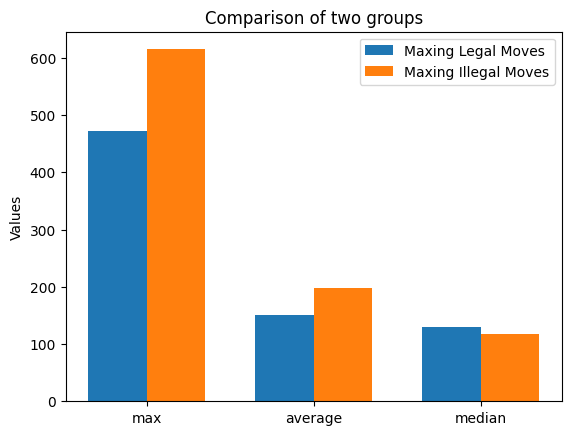

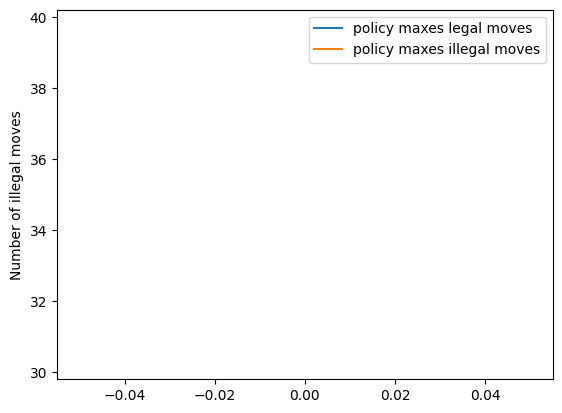

In [634]:
import matplotlib.pyplot as plt
import numpy as np


illegal_moves_df = base_df[['IllegalMoves', 'IllegalMoveReward']]
legal_values = illegal_moves_df[base_df['IllegalMoveReward'] == -1000].values[-10:,0]
illegal_values = illegal_moves_df[base_df['IllegalMoveReward'] == 1000].values[-10:,0]

# Compute statistics
max_legal = np.max(legal_values)
avg_legal = np.mean(legal_values)
med_legal = np.median(legal_values)

max_illegal = np.max(illegal_values)
avg_illegal = np.mean(illegal_values)
med_illegal = np.median(illegal_values)
labels=['max', 'average', 'median']

x_ticks = np.arange(len(labels))

bar_width=0.35

legal = np.array([max_legal, avg_legal, med_legal])
illegal = np.array([max_illegal, avg_illegal, med_illegal])

# Create the figure and axis objects
fig, ax = plt.subplots()


# Plot the bars for the first group
ax.bar(x_ticks - bar_width/2, legal, bar_width, label='Maxing Legal Moves')

# Plot the bars for the second group
ax.bar(x_ticks + bar_width/2, illegal, bar_width, label='Maxing Illegal Moves')


# Set the x-ticks and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(labels)

# Remove any default x-ticks that are not in the custom ticks list
for tick in ax.get_xticks():
    if tick not in x_ticks:
        ax.axvline(x=tick, alpha=0)


# Add labels and title
ax.set_ylabel('Values')
ax.set_title('Comparison of two groups')

print('legal avg: ' + str(avg_legal) + ' | illegal avg: ' + str(avg_illegal) + f" | size legal: {illegal_moves_df[base_df['IllegalMoveReward'] == -1000].shape[0]}")


# Add legend
ax.legend()

# Show the plot
plt.show()

#
## line chart
#
n=50
legal_averages = [sum(legal_values[i:i+n]) /
            n for i in range(0, len(legal_values), n)]
illegal_averages = [sum(illegal_values[i:i+n]) /
            n for i in range(0, len(illegal_values), n)]


plt.plot(legal_averages)
plt.plot(illegal_averages)

plt.legend(['policy maxes legal moves', 'policy maxes illegal moves'])
plt.ylabel('Number of illegal moves')

plt.show()



<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
        Plot learning rate differences
    </h3>
</div>

        IllegalMoves  IllegalMoveReward  LearningRate
0                  1            -1000.0           0.1
1                  7             1000.0           0.1
2                  4            -1000.0           0.1
3                  4             1000.0           0.1
4                  2             1000.0           0.1
...              ...                ...           ...
199994             7             1000.0           0.1
199995           141             1000.0           0.1
199996           181             1000.0           0.1
199997           236             1000.0           0.1
199998            55             1000.0           0.1

[199999 rows x 3 columns]
[1525.          372.87386667   71.        ]
[491.   101.28  71.  ]


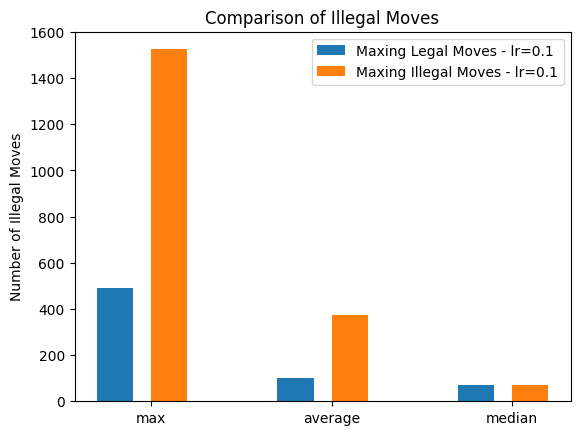

In [635]:
import matplotlib.pyplot as plt
import numpy as np

df = learning_rate_df[['IllegalMoves', 'IllegalMoveReward', 'LearningRate']]

print(df)

amount=5000

legal_values_01 = df[(df['IllegalMoveReward'] == -1000) &
                     (df['LearningRate'] == 0.1)].values[-50:, 0]
# legal_values_05 = df[(df['IllegalMoveReward'] == -1000) &
#                      (df['LearningRate'] == 0.5)].values[-5:, 0]
# legal_values_1 = df[(df['IllegalMoveReward'] == 1000) &
#                     (df['LearningRate'] == 1)].values[-5:, 0]
illegal_values_01 = df[(df['IllegalMoveReward'] == 1000)
                       & (df['LearningRate'] == 0.1)].values[-amount:, ]
# illegal_values_05 = df[(df['IllegalMoveReward'] == 1000)
#                        & (df['LearningRate'] == 0.5)].values[-5:, 0]
# illegal_values_1 = df[(df['IllegalMoveReward'] == 1000)
#                       & (df['LearningRate'] == 1)].values[-5:, 0]



legal_01 = np.array([np.max(legal_values_01),  np.mean(
    legal_values_01), np.median(legal_values_01)])
# legal_05 = np.array([np.max(legal_values_05),  np.mean(
#     legal_values_05), np.median(legal_values_05)])
# legal_1 = np.array([np.max(legal_values_1),  np.mean(
#     legal_values_1), np.median(legal_values_1)])

illegal_01 = np.array([np.max(illegal_values_01),  np.mean(
    illegal_values_01), np.median(illegal_values_01)])
# illegal_05 = np.array([np.max(illegal_values_05),  np.mean(
#     illegal_values_05), np.median(illegal_values_05)])
# illegal_1 = np.array([np.max(illegal_values_1),  np.mean(
#     illegal_values_1), np.median(illegal_values_1)])


labels = ['max', 'average', 'median']

# Create the figure and axis objects
fig, ax = plt.subplots()


# Define the x positions for the bars
x_ticks = np.arange(len(labels))
bar_width = 0.2
offset = bar_width / 2

# Plot the bars for the first group
ax.bar(x_ticks - 2 * offset, legal_01, bar_width,
       label='Maxing Legal Moves - lr=0.1')
# ax.bar(x_ticks - offset, legal_05, bar_width,
#        label='Maxing Legal Moves - lr=0.5')
# ax.bar(x_ticks, legal_1, bar_width, label='Maxing Legal Moves - lr=1')

# Plot the bars for the second group
ax.bar(x_ticks + offset, illegal_01, bar_width,
       label='Maxing Illegal Moves - lr=0.1')
# ax.bar(x_ticks + 2 * offset, illegal_05, bar_width,
#        label='Maxing Illegal Moves - lr=0.5')
# ax.bar(x_ticks + 3 * offset, illegal_1, bar_width,
#        label='Maxing Illegal Moves - lr=1')

print(illegal_01)
print(legal_01)

# Set the x-ticks and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(labels)

# Remove any default x-ticks that are not in the custom ticks list
for tick in ax.get_xticks():
    if tick not in x_ticks:
        ax.axvline(x=tick, alpha=0)


# Add labels and title
ax.set_ylabel('Number of Illegal Moves')
ax.set_title('Comparison of Illegal Moves')

# Add legend
ax.legend()

# Show the plot
plt.show()


<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
        Plot Learning over Time
    </h3>
</div>

[420. 119.  64. ...  62.  96. 145.]


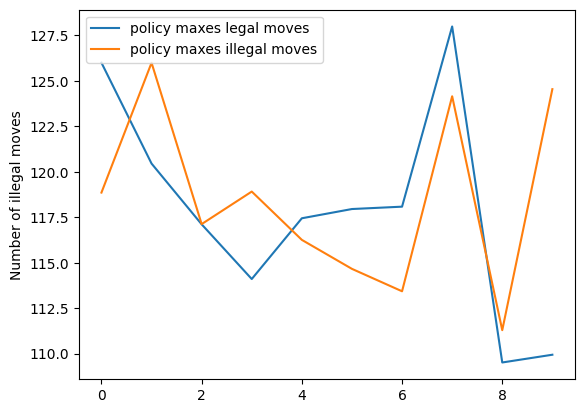

In [636]:
# n = group size
amount = 5000
n = 500

legal_values_01 = df[(df['IllegalMoveReward'] == -1000) &
                     (df['LearningRate'] == 0.1)].values[-amount:, 0]
legal_averages = [sum(legal_values_01[i:i+n]) /
            n for i in range(0, len(legal_values_01), n)]

illegal_values_01 = df[(df['IllegalMoveReward'] == 1000)
                       & (df['LearningRate'] == 0.1)].values[-amount:, 0]
illegal_averages = [sum(illegal_values_01[i:i+n]) /
            n for i in range(0, len(illegal_values_01), n)]

print(legal_values_01)

# Create the figure and axis objects
line = plt.plot(legal_averages)
line = plt.plot(illegal_averages)

plt.legend(['policy maxes legal moves', 'policy maxes illegal moves'])
plt.ylabel('Number of illegal moves')

# Show the plot
plt.show()
